## EKLAVYA SHARMA
### 8902545

Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [9]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


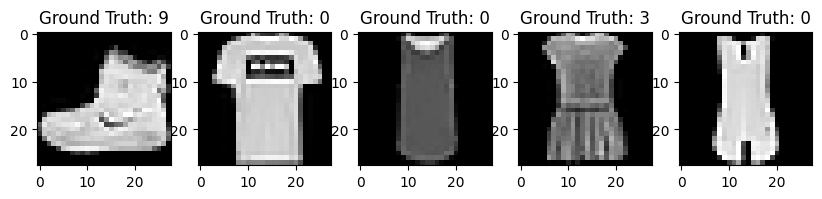

In [10]:
# Explore the data
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
print('Total number of outputs : ', len(classes))
print('Output classes : ', classes)

# Display the first few images from the training dataset
plt.figure(figsize=[10,5])
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title("Ground Truth: {}".format(train_labels[i]))

Training a Dense Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [12]:
# Preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0

# Prepare the labels 
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [13]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu')) # 128 neurons as taken in class
model.add(Dense(10, activation='softmax')) # since 10 output labels

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels_one_hot, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5313 - accuracy: 0.8153 - val_loss: 0.4383 - val_accuracy: 0.8446
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3948 - accuracy: 0.8585 - val_loss: 0.3853 - val_accuracy: 0.8660
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3562 - accuracy: 0.8723 - val_loss: 0.3789 - val_accuracy: 0.8642
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3279 - accuracy: 0.8802 - val_loss: 0.3550 - val_accuracy: 0.8756
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3073 - accuracy: 0.8889 - val_loss: 0.3417 - val_accuracy: 0.8775
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2937 - accuracy: 0.8926 - val_loss: 0.3305 - val_accuracy: 0.8806
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2806 - accuracy: 0.8964 - val_loss: 0.3291 - val_accuracy: 0.8814
Epoch 

Evaluating the Model and Exploring Misclassifications

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot, verbose=0)
print('\nTest accuracy:', test_acc)

# Predict the labels
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)


Test accuracy: 0.8694999814033508
313/313 [==============================] - 0s 1ms/step


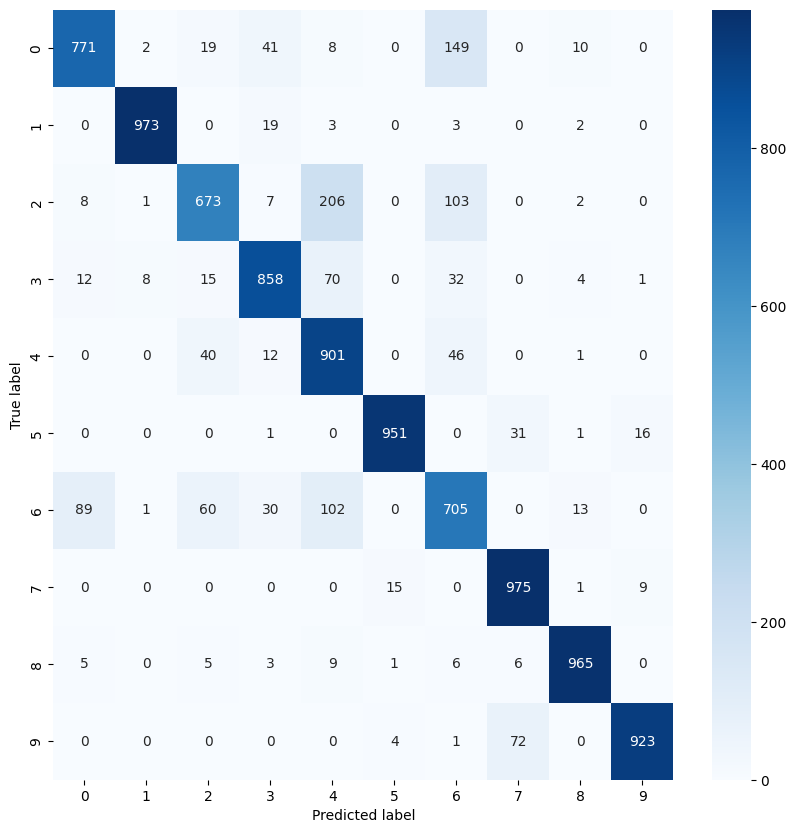

In [17]:
# Confusion Matrix
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

As we can see the values across the diagonals are more, hence our model did a great job assigning classes to their right classes.  
classes 2 and 6 which look like sweat shirts and sweaters had poor performance , maybe because they look similar

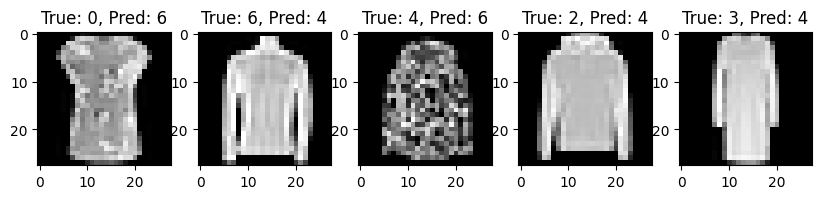

In [18]:
# Explore misclassifications
misclassified_idx = np.where(pred_labels != test_labels)[0]
sample_idx = np.random.choice(misclassified_idx, 5, replace=False)
plt.figure(figsize=(10, 5))
for i, idx in enumerate(sample_idx):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.title("True: {}, Pred: {}".format(test_labels[idx], pred_labels[idx]))